# Introduction to Data Visualization <font color='blue'></font>

# 0) Importing the right tools <font color='blue'> (5 min) </font>

### <font color='red'>0.1) Import the necessary packages: </font>

- pandas (aliased as pd)
- seaborn (aliased as sns)
- matplotlib.pyplot (aliased as plt)

In [1]:
from __future__ import division

import warnings
warnings.filterwarnings('ignore')

#### IMPORT THE ABOVE PACKAGES WITH THE ADEQUATE ALIASES ####
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### <font color='red'>0.2) Import the dataset from <i>'../data/my_data_after_simple_prep.csv'</i> using the <i>pd.read_csv()</i> function</font>

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x000001ECE88AFD80>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_

In [3]:
raw_data = pd.read_csv('my_data_after_simple_prep.csv', sep=',')
raw_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,2015-06-01 00:00:00,2015-06-01 00:22:00,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,2015-06-01 00:00:00,2015-06-01 00:05:00,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,2015-06-01 00:01:00,2015-06-01 00:11:00,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,2015-06-01 00:01:00,2015-06-01 00:04:00,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,2015-06-01 00:02:00,2015-06-01 00:22:00,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,1979.0,0


### <font color='red'>0.3) Show a sample of 2 observations from the dataset, using the <i>.sample()</i> function</font>

In [4]:
data = raw_data.copy()
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
709135,898,2015-06-24 07:48:00,2015-06-24 08:03:00,448,W 37 St & 10 Ave,40.756604,-73.997901,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,19899,Subscriber,1990.0,2
274948,1467,2015-06-10 17:23:00,2015-06-10 17:47:00,151,Cleveland Pl & Spring St,40.721816,-73.997203,420,Clermont Ave & Lafayette Ave,40.687645,-73.969689,16433,Subscriber,1982.0,1


In [5]:
data.shape

(935636, 15)

# Visualizations

## 1) Plotting features distributions with seaborn package <font color='blue'> (55 min) </font>

### <font color='red'>Refer to the following pages to understand how you can leverage the <i>seaborn</i> package to understand your data:</font>

- http://stanford.edu/~mwaskom/software/seaborn/examples/distplot_options.html
- http://stanford.edu/~mwaskom/software/seaborn/examples/

### <font color='red'>1.1) Plot the distribution of trip durations (in minutes) using <i>sns.distplot(data.column_name)</i></font>

In [8]:
help(sns.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> set_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    See Also
    --------
    axes_style : return a dict of parameters or use in a ``with`` statement
                 to temporarily set the style.
    set_context : set parameters to scale plot elements


Text(0.5,1,'Bike Trip Duration')

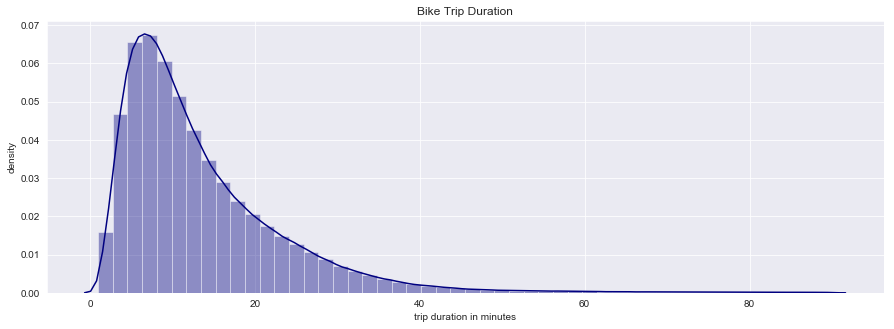

In [27]:
sns.set_style("darkgrid")  # This uses the dark style of seaborn for better understanding
plt.figure(figsize = (15,5))
sns.distplot(data.tripduration/60, color = 'navy')
plt.xlabel('trip duration in minutes')
plt.ylabel('density')
plt.title('Bike Trip Duration')

#### PLOT THE DISTRIBUTION OF TRIP DURATIONS, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####

### <font color='red'>1.2) Filter out data for which gender is unknown (i.e gender=0) and birth year is before 1935</font>

In [28]:
condition1 = data.gender != 0
condition2 = data['birth year'] >= 1935
truncated_data = data[(condition1) & (condition2)]
truncated_data.shape

(808654, 15)

Text(0.5,1,'Birth Year')

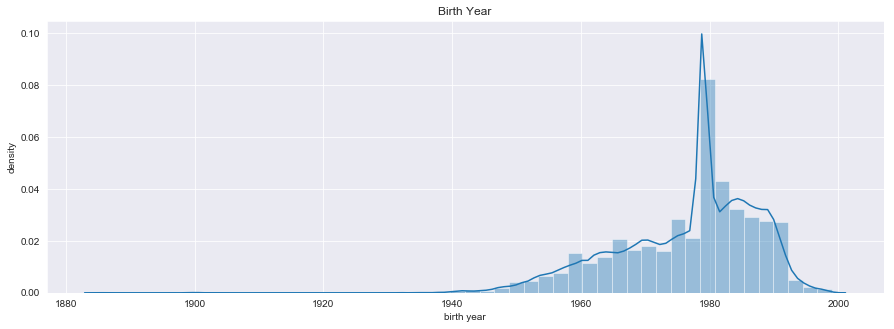

In [30]:
sns.set_style("darkgrid")  # This uses the dark style of seaborn for better understanding
plt.figure(figsize = (15,5))
sns.distplot(data['birth year'])
plt.xlabel('birth year')
plt.ylabel('density')
plt.title('Birth Year')

### <font color='red'>1.3) Plot the distribution of bikes riders subscribers ages</font>

In [33]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

Text(0.5,1,'Distribution of Bike Rider Age')

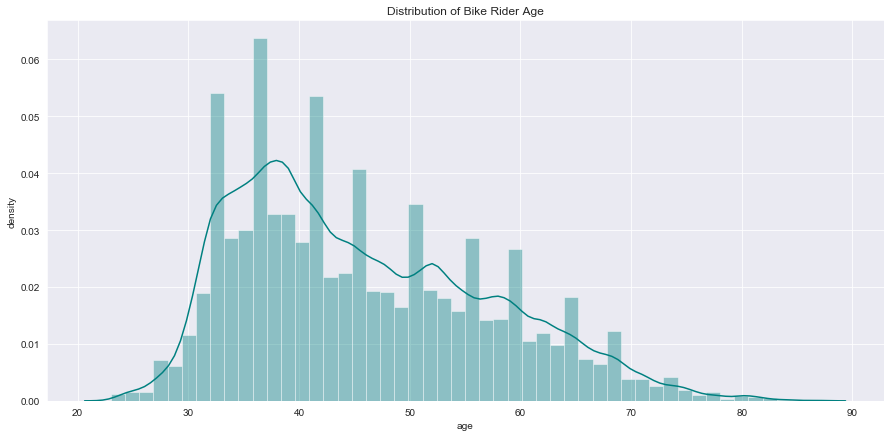

In [32]:
#### PLOT THE DISTRIBUTION OF SUBSCRIBERS AGES, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####
sns.set_style("darkgrid")  # This uses the dark style of seaborn for better understanding
plt.figure(figsize = (15,7))
sns.distplot(2022 - truncated_data['birth year'], color = 'teal')
plt.xlabel('age')
plt.ylabel('density')
plt.title('Distribution of Bike Rider Age')

### <font color='red'>1.4) Use <i>sns.countplot</i> on <i>data.usertype</i> to understand the repartition of genders and usertypes</font>

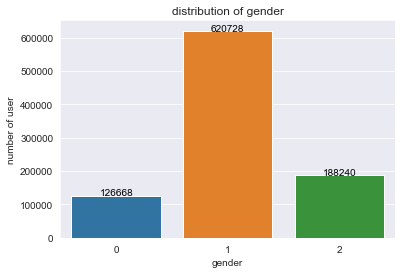

In [36]:
#### PLOT THE DISTRIBUTION OF GENDERS HERE, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####
g = sns.countplot(data.gender) #, order = [0,1,2])

for p in g.patches:
    g.text(p.get_x()+0.25, p.get_height()+1, '%i' % p.get_height(), color = 'black')

plt.xlabel('gender')
plt.ylabel('number of user')
plt.title('distribution of gender')
show()

Text(0.5,1,'distribution of user type')

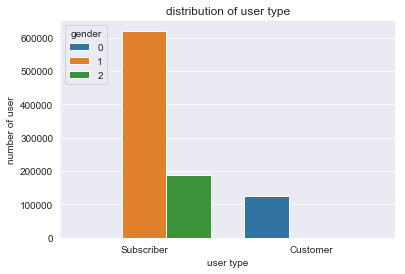

In [40]:
#### PLOT THE DISTRIBUTION OF USERTYPES HERE, MAKING SURE YOU ADD X AND Y LABELS, AS WELL AS A CLEAR TITLE ####
sns.countplot(data.usertype, hue=data.gender, orient = 'v')
plt.xlabel('user type')
plt.ylabel('number of user')
plt.title('distribution of user type')

In [38]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or list 

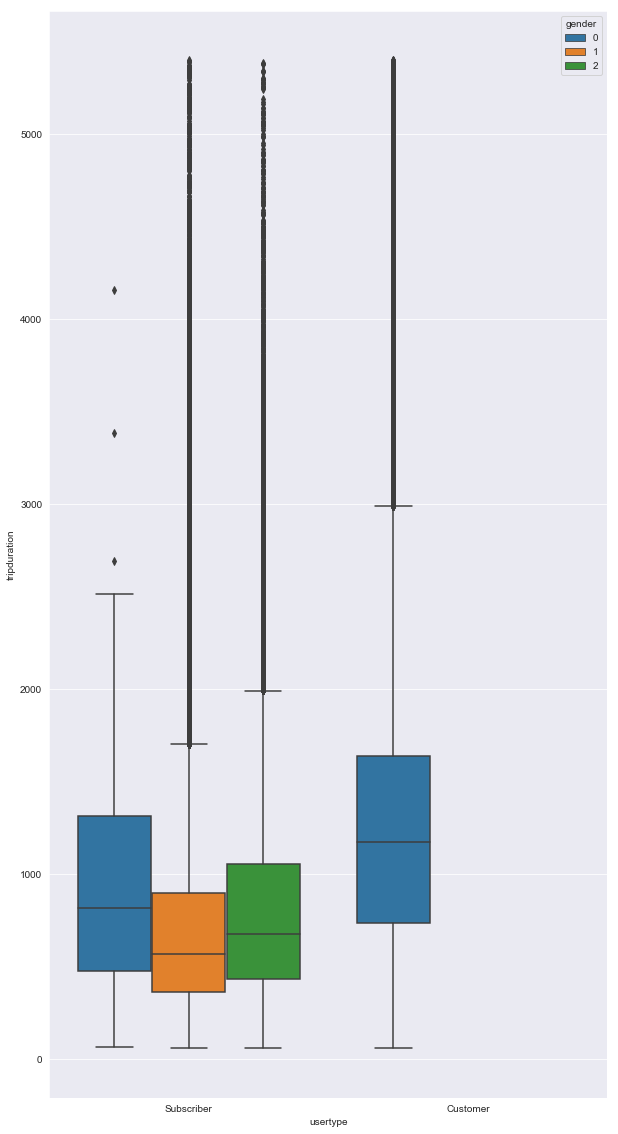

In [63]:
plt.figure(figsize = (10, 20))
sns.boxplot(x = "usertype", y = "tripduration", data = data, hue = 'gender')

## Matplotlib piecharts

### <font color='red'>Run the following blocks, that group by data with respect to gender</font>

In [43]:
groupby_gender = data.groupby(['gender']).count()
groupby_gender

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year
gender,,,,,,,,,,,,,,
0,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668
1,620728,620728,620728,620728,620728,620728,620728,620728,620728,620728,620728,620728,620728,620728
2,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240


In [44]:
groupby_usertype = data.groupby(['usertype']).count()
groupby_usertype['tripduration']

usertype
Customer      126079
Subscriber    809557
Name: tripduration, dtype: int64

In [45]:
groupby_start_station = data.groupby(['start station name']).count()
groupby_start_station['tripduration']

start station name
1 Ave & E 15 St                 4414
1 Ave & E 18 St                 2967
1 Ave & E 30 St                 3754
1 Ave & E 44 St                 2476
10 Ave & W 28 St                3980
                                ... 
Willoughby Ave & Hall St         717
Willoughby Ave & Walworth St     614
Willoughby St & Fleet St        1001
Wythe Ave & Metropolitan Ave    1977
York St & Jay St                1794
Name: tripduration, Length: 326, dtype: int64

### <font color='red'>1.5) Use <i>plt.pie</i> with the <i>labels</i> and <i>explode</i> attributes to plot differently the number of males, females, and unknown genders</font>

In [47]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels

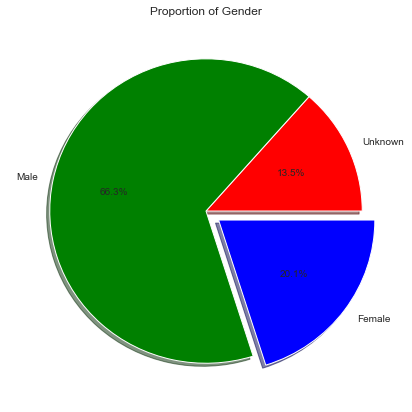

In [52]:
explode = (0, 0, 0.1)
labels = ['Unknown','Male','Female']

plt.figure(figsize=(7,7))

#### USE plt.pie() WITH THE RIGHT ATTRIBUTES TO PIE PLOT MALES, FEMALES, UNKNOWN GENDERS ####
plt.pie(groupby_gender['starttime'], explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, \
        labeldistance = 1.1, \
       colors=('r', 'g', 'b')) #colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'))
plt.title('Proportion of Gender')
plt.show()

### <font color='red'>1.6) Use <i>sns.countplot</i> to plot number of trips vs. user types for <i>truncated_data</i></font>

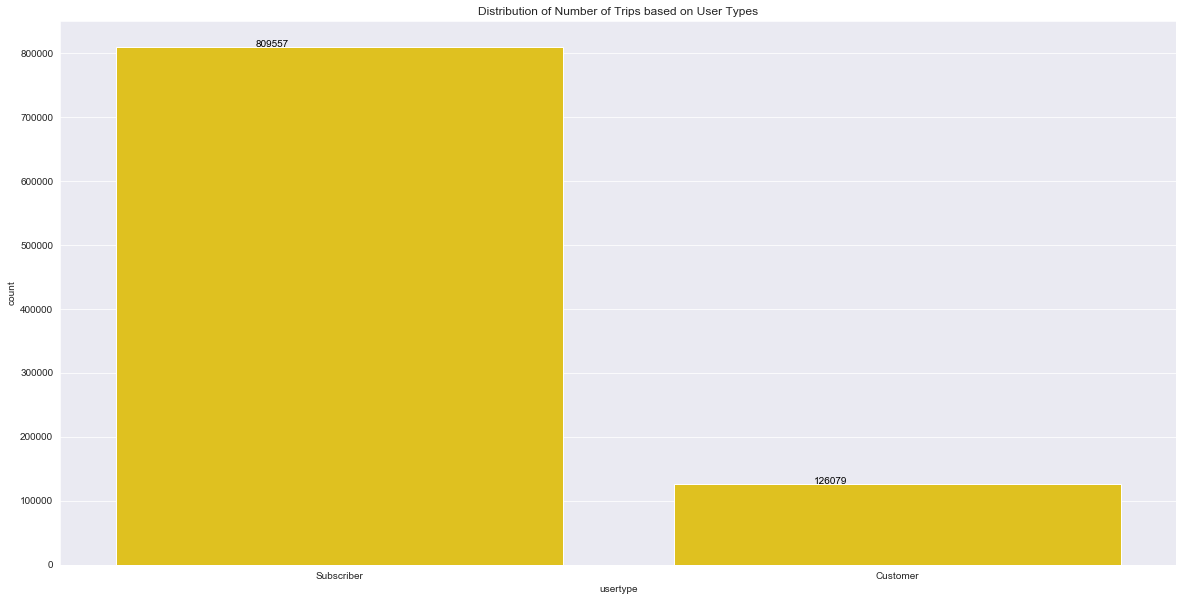

In [55]:
#### USE sns.countplot() HERE FOR NUMBER OF TRIPS VS. WEATHER CONDITIONS ####
plt.figure(figsize(20,10))
g = sns.countplot(data.usertype, color = 'gold')
for p in g.patches:
    g.text(p.get_x()+0.25, p.get_height()+1, '%i' % p.get_height(), color = 'black')
    
#### ADD A CLEAR TITLE ####
plt.title('Distribution of Number of Trips based on User Types')
plt.show()

## 2) Exercise <font color='blue'> (60 min) </font>

### <font color='red'>2.1) Visualize the distribution of birth year?</font>

Text(0.5,1,'Distribution of Birth Year')

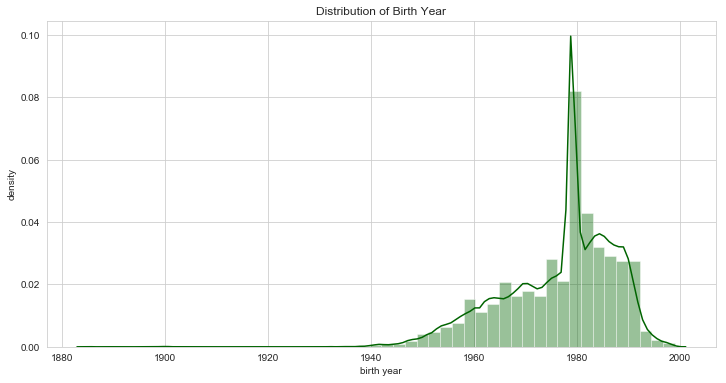

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
sns.distplot(data['birth year'], color = 'darkgreen')
plt.xlabel('birth year')
plt.ylabel('density')
plt.title('Distribution of Birth Year')

Text(0.5,1,'Distribution of Birth Year, Type: Subscriber')

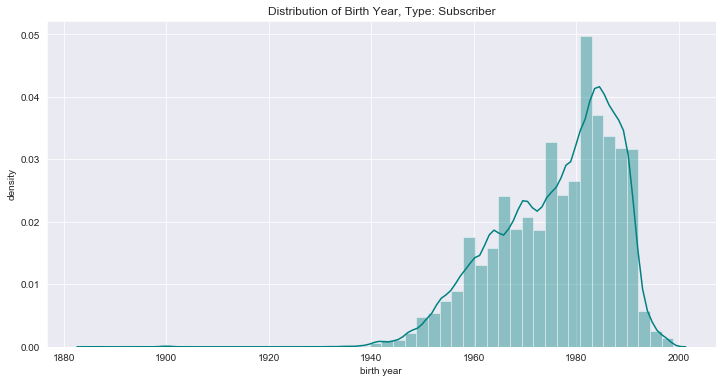

In [73]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
sns.distplot(data[data['usertype'] == 'Subscriber']['birth year'], color = 'teal')
plt.xlabel('birth year')
plt.ylabel('density')
plt.title('Distribution of Birth Year, Type: Subscriber')

Text(0.5,1,'Distribution of Birth Year, Type: Customer')

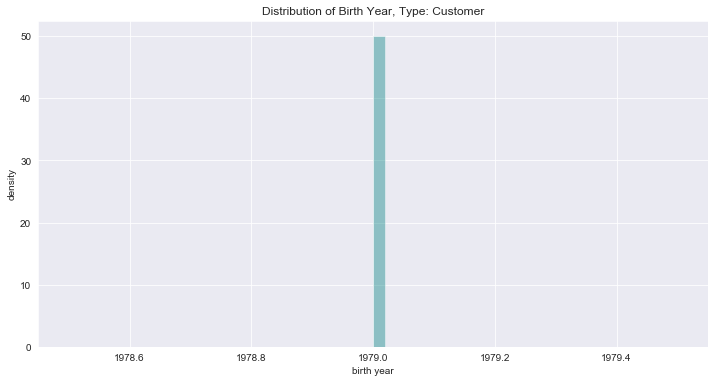

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
sns.distplot(data[data['usertype'] == 'Customer']['birth year'], color = 'teal')
plt.xlabel('birth year')
plt.ylabel('density')
plt.title('Distribution of Birth Year, Type: Customer')

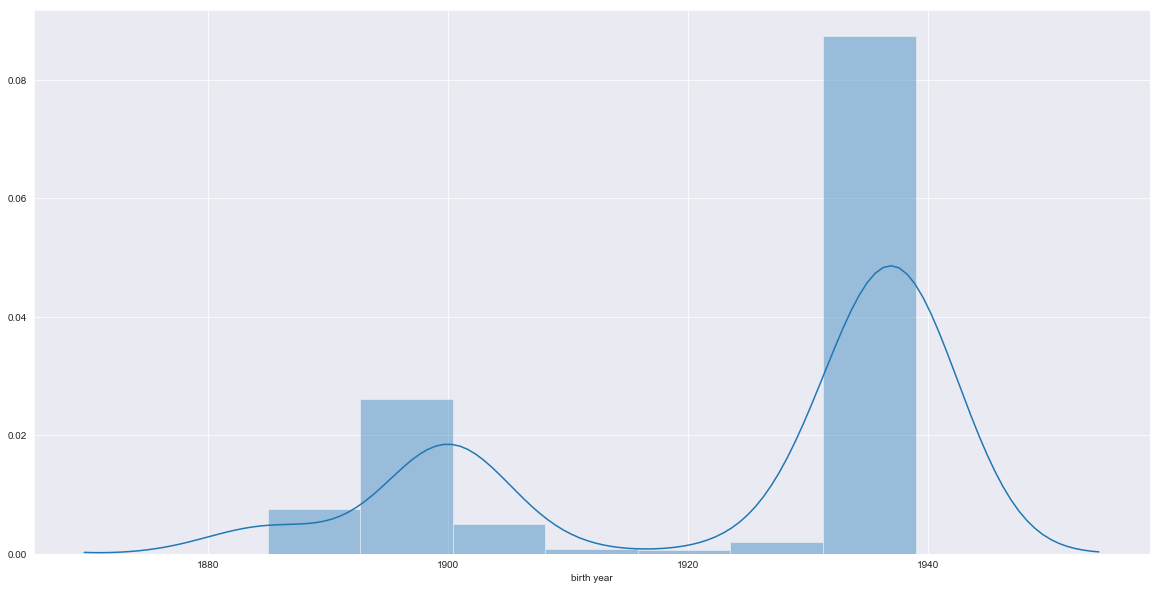

In [80]:
sns.distplot(data[data['birth year'] < 1940]['birth year'])

### <font color='red'>2.1.a) Visualize the distribution of birth year >=1975 with red color?</font>

Text(0.5,1,'birth year')

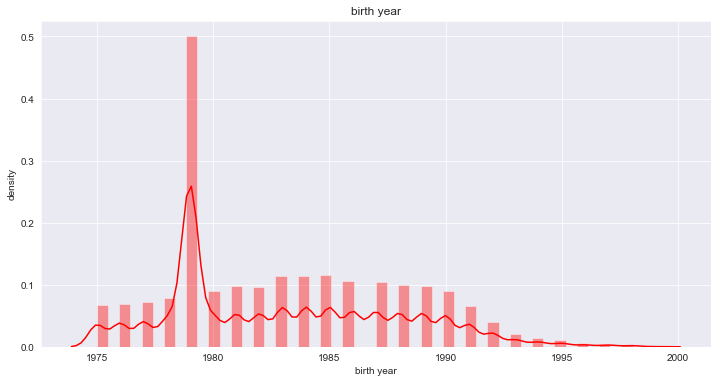

In [70]:
data1 = data[data["birth year"] >= 1975]
sns.set_style("darkgrid")  # This uses the dark style of seaborn for better understanding
plt.figure(figsize = (12,6))
sns.distplot(data1["birth year"], color = 'r')
plt.xlabel('birth year')
plt.ylabel('density')
plt.title('birth year')

### <font color='red'>2.2) Visualize the distribution of trip duration by female?</font>

Text(0.5,1,'Distribution of Trip Duration by Female')

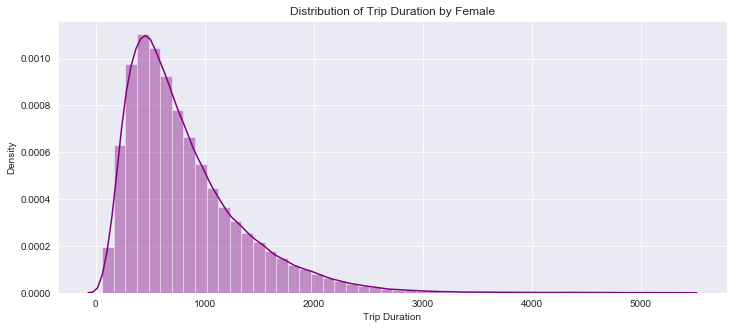

In [98]:
sns.set_style("darkgrid")  
plt.figure(figsize = (12,5))
sns.distplot(data[data['gender'] == 2]['tripduration'], color = 'purple')
# sns.distplot(data[(data['gender'] == 2) & (data['tripduration'] > 3000)]['tripduration'], color = 'green')
plt.xlabel('Trip Duration')
plt.ylabel('Density')
plt.title('Distribution of Trip Duration by Female')

Text(0.5,1,'Distribution of Trip Duration by Female')

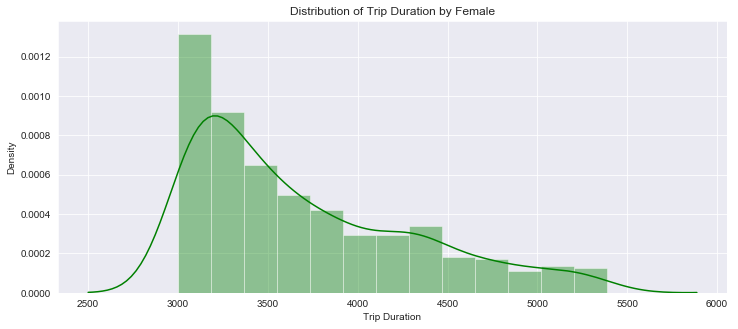

In [100]:
sns.set_style("darkgrid")  
plt.figure(figsize = (12,5))
sns.distplot(data[(data['gender'] == 2) & (data['tripduration'] > 3000)]['tripduration'], color = 'green')
plt.xlabel('Trip Duration')
plt.ylabel('Density')
plt.title('Distribution of Trip Duration by Female')

### <font color='red'>2.3) Visualize the distribution of trip duration by gender?</font>

Text(0.5,1,'Trip Duration by Gender')

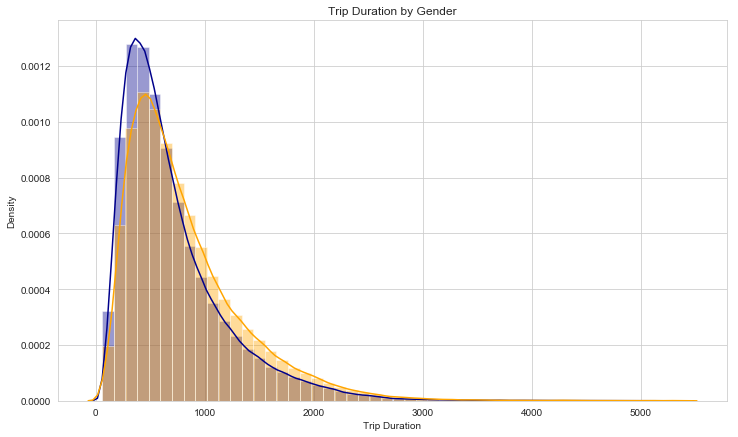

In [103]:
data_male = data[data['gender'] == 1]
data_female = data[data['gender'] == 2]

sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.distplot(data_male['tripduration'], color = 'darkblue')
sns.distplot(data_female['tripduration'], color = 'orange')
plt.xlabel('Trip Duration')
plt.ylabel('Density')
plt.title('Trip Duration by Gender')

Text(0.5,1,'Trip Duration by User Type')

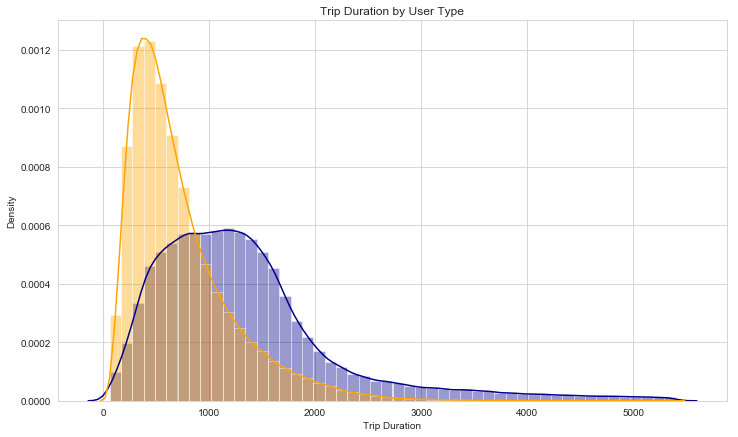

In [107]:
data_customer = data[data['usertype'] == 'Customer']
data_subscriber = data[data['usertype'] == 'Subscriber']

sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.distplot(data_customer['tripduration'], color = 'darkblue')
sns.distplot(data_subscriber['tripduration'], color = 'orange')
plt.xlabel('Trip Duration')
plt.ylabel('Density')
plt.title('Trip Duration by User Type')

### <font color='red'>2.4) Create a chart that shows number of trip by gender in the axis and differentiate usertype by color?</font>

Text(0,0.5,'Number of Trips')

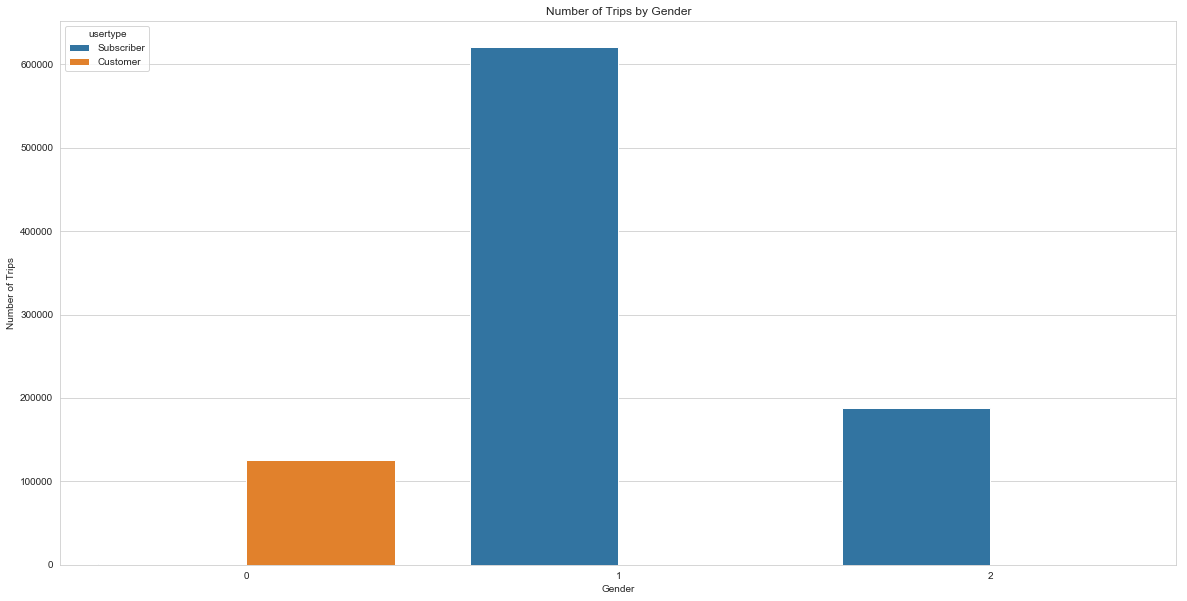

In [116]:
sns.countplot(data['gender'], hue = data['usertype'])
plt.title("Number of Trips by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Trips")

### <font color='red'>2.5) Create a pie chart to show the proportion of usertype?</font>

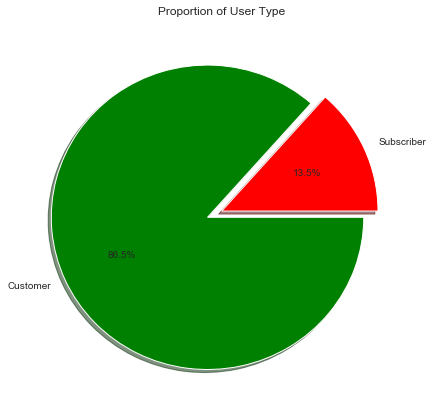

In [132]:
explode = (0, 0.1)
labels = ['Subscriber', 'Customer']
groupby_usertype = data.groupby(['usertype']).count()

plt.figure(figsize=(7,7))

#### USE plt.pie() WITH THE RIGHT ATTRIBUTES TO PIE PLOT MALES, FEMALES, UNKNOWN GENDERS ####
plt.pie(groupby_usertype.bikeid, explode = explode, labels = labels, labeldistance = 1.1, autopct = '%1.1f%%', \
        shadow = True, colors=('r', 'g', 'b'))#colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'))
plt.title('Proportion of User Type')
plt.show()

In [ ]:
# boxtplot
# axis (x) = usertype
# ordinat (y) = birth year
# color = gender

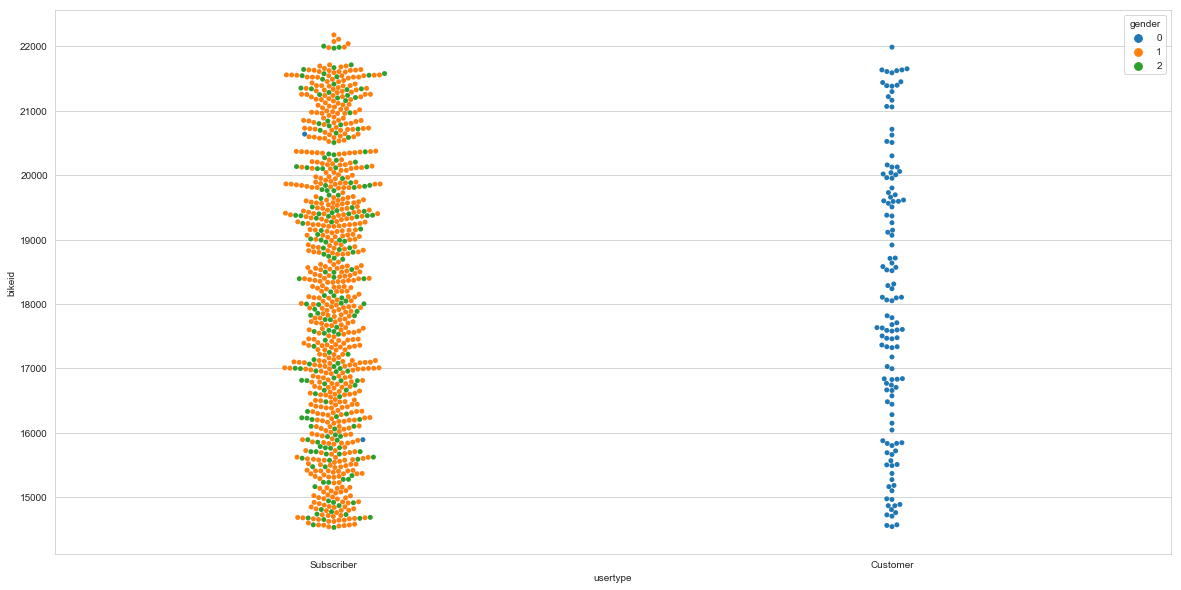

In [138]:
short_trips = data[data['tripduration'] < 70]
len(short_trips)
sns.swarmplot(data = short_trips, x = 'usertype', y = 'bikeid', hue = 'gender')

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10,7))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="usertype", y="birth year",
            hue="gender", palette=["r", "g", "b"],
            data=data)
#sns.despine(offset=10, trim=True)

## --------------- End of This Session ---------------